In [1]:
# %matplotlib inline
import numpy as np
from pandas import DataFrame
import matplotlib
matplotlib.rcParams['font.size'] = 12

In [2]:
class Bandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.means = np.zeros(self.arms)

    def select(self, arm):
        reward = np.random.normal(loc=self.means[arm], scale=1.0)
        self.means += np.random.normal(loc=0.0, scale=0.01, size=self.arms)
        return reward

In [3]:
def get_action(qs, epsilon):
  if np.random.random() < epsilon:
    # Explore: choose randomly.
    return np.random.randint(len(qs))
  else:
    # Exploit: choose the arm with the max average.
    return np.argmax(qs)

In [4]:
def episode(bandit, alpha, steps):
    total_rewards = [0]
    qs = [0] * bandit.arms
    count = [0] * bandit.arms

    for _ in range(steps):
        arm = get_action(qs, epsilon=0.1)
        reward = bandit.select(arm)
        total_rewards.append(total_rewards[-1] + reward)

        if alpha == 0:
            count[arm] += 1
            qs[arm] += (reward - qs[arm]) / count[arm]
        else:
            qs[arm] += alpha * (reward - qs[arm])

    return total_rewards

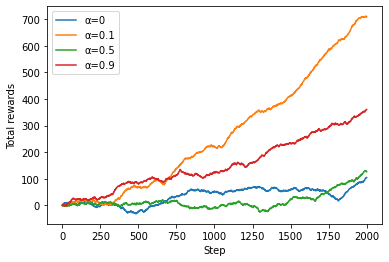

In [5]:
rewards = {}
for alpha in [0, 0.1, 0.5, 0.9]:
    bandit = Bandit()
    rewards['α={}'.format(alpha)] = episode(bandit, alpha, steps=2000)

ax = DataFrame(rewards).plot()
_ = ax.set_xlabel('Step')
_ = ax.set_ylabel('Total rewards')

In [6]:
def hypertune(values, num_samples):
    rewards = {}
    for alpha in values:
        scores = []
        for _ in range(num_samples):
            bandit = Bandit()
            result = episode(bandit, alpha, steps=2000)
            scores.append(result[-1])
        rewards['{:1.1f}'.format(alpha)] = scores

    ax = DataFrame(rewards).plot(kind='box', figsize=(6,8))
    _ = ax.set_xlabel('α')
    _ = ax.set_ylabel('Total rewards')

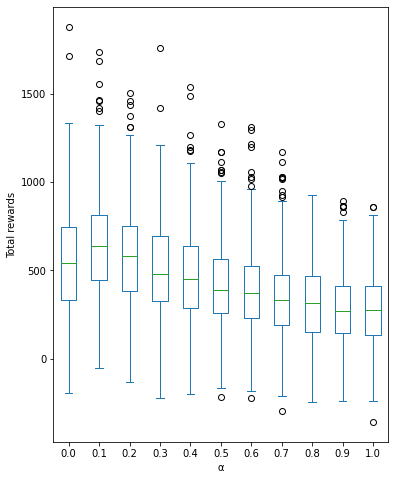

In [7]:
hypertune(np.linspace(0, 1.0, 11), num_samples=500)